In [1]:
import random
import numpy as np
import shapely
from shapely.geometry import Point, LineString
from matplotlib import pyplot as plt
import anytree
from IPython.display import IFrame
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
import osmnx as ox
import pandas as pd
import geopandas as gpd
ox.config(use_cache=True, log_console=False)
from descartes import PolygonPatch
from sklearn.datasets import make_blobs

Los kd-tree son estructuras que nos permiten indexar (ordenar , clasificar) puntos (datos) dividiendo el espacio usando hiperplanos para tal motivo. Los kd-trees son árboles binarios lo que nos permite hacer busquedas rápidas en los datos.

Los $kd$-trees son árboles en donde los nodos son puntos de dimension $k$ ($kd$) de ahí su nombre, la idea es que dichos puntos sirven como referencia para la división de un espacio de dimensión $k$, usando hiperplanos paralelos a los ejes que pasan por dichos puntos  dividiendo el espacio en dos. En nuestro caso ($2D$) los hiperplanos son lineas paralelas a los ejes.



In [82]:
class Node_KD():
    def __init__(self,puntos, nivel):
        
        if not puntos:
            return
        self.nivel = nivel
        
        if nivel%2==0:
            puntos.sort(key=lambda a: a.x)
        else:
            puntos.sort(key=lambda a: a.y)
        
        self.puntos = puntos
        medio = len(self.puntos)//2

        self.Point = self.puntos[medio]
        
        self.child_L = None
        self.child_R = None
    
    def get_Point(self):
        return self.Point
    
    def get_puntos(self):
        return self.puntos
    
    def get_nivel(self):
        return self.nivel
    

In [175]:
class KDTree():
    def __init__(self, threshold, puntos_t, nivel_max=1):
        self.threshold = threshold
        self.nivel_max = nivel_max
        self.Puntos = puntos_t
        if not puntos_t:
            return None
        self.root = Node_KD(puntos_t, nivel =0)
        
    def suvdivide(self):
        division(self.root, self.threshold,nivel_max=self.nivel_max)
    
    def imprime(self):
        fig, axs = plt.subplots(figsize=(12, 8))
        axs.set_title("kd-tree")
        c = todos(self.root)
        print("Numero de nodos: ", len(c))        
        x = [point.x for point in self.Puntos]
        y = [point.y for point in self.Puntos]
        plt.plot(x, y, 'ro')
        
        for n in c:
            x_points = [points.x for points in n.puntos]
            y_points = [points.y for points in n.puntos]
            max_x = max(x_points)
            max_y = max(y_points)
            min_x = min(x_points)
            min_y = min(y_points)
            if n.nivel%2==0:
                axs.axvline(n.Point.x, min_y, max_y)
            else:
                axs.axhline(n.Point.y, min_x, max_x )
            axs.plot(n.Point.x,n.Point.y, 'v' )
            
        
        plt.show()
        return
    
    def imprime2(self):
        fig, axs = plt.subplots(figsize=(12, 8))
        axs.set_title("kd-tree")
        c = todos(self.root)
        print("Numero de nodos: ", len(c))        
        x = [point.x for point in self.Puntos]
        y = [point.y for point in self.Puntos]
        plt.plot(x, y, 'ro')
        
        for n in c:
            x_points = [points.x for points in n.puntos]
            y_points = [points.y for points in n.puntos]
            max_x = max(x_points)
            max_y = max(y_points)
            min_x = min(x_points)
            min_y = min(y_points)
        
            axs.plot([min_x, max_x,max_x, min_x, min_x] ,[min_y,min_y, max_y,max_y,min_y])
            axs.plot(n.Point.x,n.Point.y, 'v' )
            
        
        plt.show()
        return

In [176]:
def division(nodo, threshold, nivel_max):
    
    if len(nodo.puntos) < threshold :
        return
    if nodo.nivel > nivel_max:
        return 
    
    if nodo.nivel%2==0:
        puntos_L = [point for point in nodo.puntos if point.x < nodo.Point.x]
        puntos_R = [point for point in nodo.puntos if point.x >= nodo.Point.x]
    else:
        puntos_L = [point for point in nodo.puntos if point.y < nodo.Point.y]
        puntos_R = [point for point in nodo.puntos if point.y >= nodo.Point.y]
    
    if not nodo.puntos:
        return 
    medio = len(nodo.puntos)//2
    
    
    child_L = Node_KD( puntos_L, nivel = nodo.nivel +1 )
    division(child_L, threshold, nivel_max)
    child_R = Node_KD(puntos_R, nivel = nodo.nivel +1  )
    division(child_R, threshold, nivel_max)
    
    nodo.child_L = child_L
    nodo.child_R = child_R

def todos(nodo):
    
    if not nodo.child_L and not nodo.child_L :
        return [nodo]
    else:
        children = [nodo]
        children += todos(nodo.child_L)+ todos(nodo.child_R)
    return children

In [177]:
n= 400
puntos_random = [shapely.geometry.Point(random.uniform(0, 1), random.uniform(0, 1)) for x in range(n)]    

In [178]:
R1 = KDTree(10, puntos_random, nivel_max=4)

Numero de nodos:  1


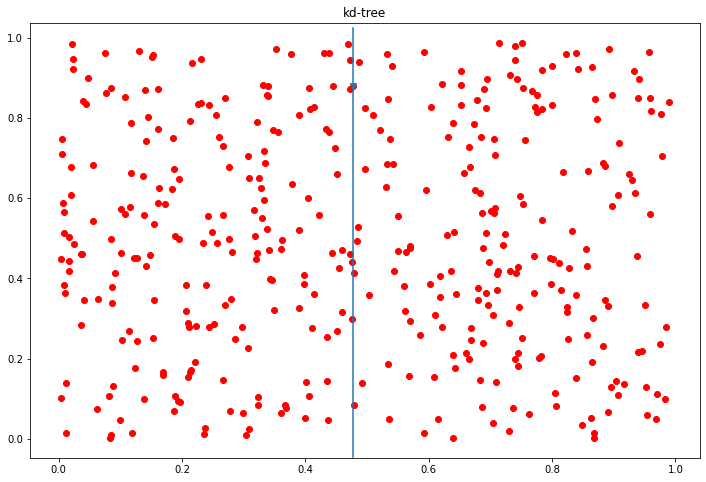

In [179]:
R1.imprime()

In [180]:
R1.suvdivide()

Numero de nodos:  63


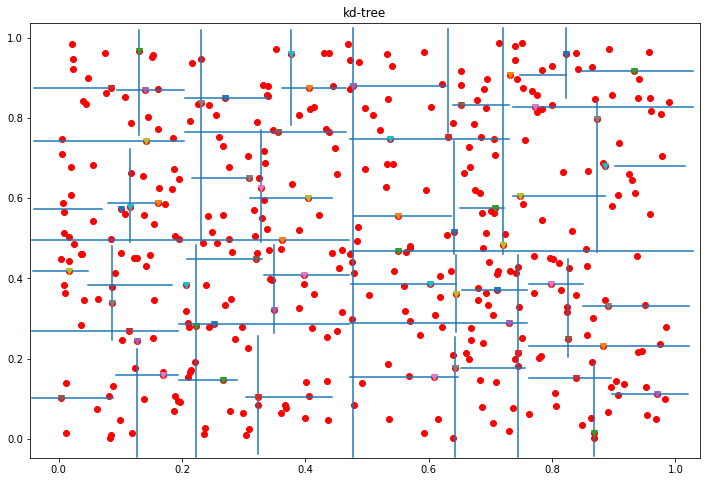

In [181]:
R1.imprime()

In [182]:
nodos= todos(R1.root)

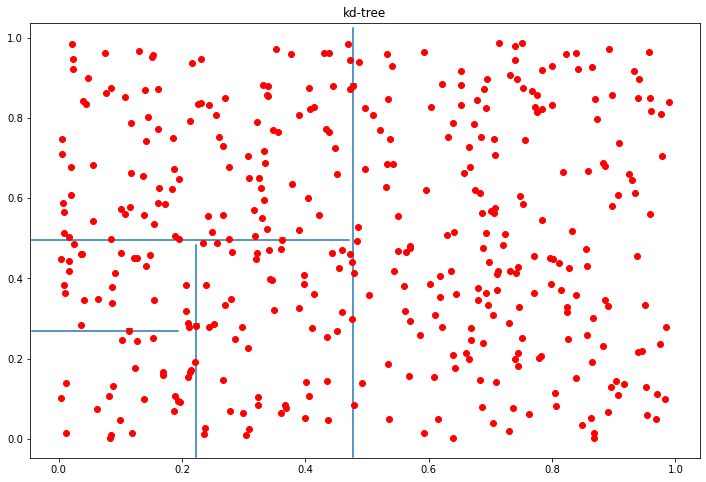

In [185]:
fig, axs = plt.subplots(figsize=(12, 8))
axs.set_title("kd-tree")
for n in nodos[:4]:
    x_points = [points.x for points in n.puntos]
    y_points = [points.y for points in n.puntos]
    max_x = max(x_points)
    max_y = max(y_points)
    min_x = min(x_points)
    min_y = min(y_points)
    #print('max x:', max_x )
    #print('max y:', max_y )
    #print('min x:', min_x )
    #print('min y:', min_y )
       
    if n.nivel%2==0: 
        axs.axvline(n.Point.x, min_y, max_y)
    else:
        axs.axhline(n.Point.y, min_x, max_x )
    axs.plot(n.Point.x,n.Point.y, 'v' )
x_points_big = [points.x for points in nodos[0].puntos]
y_points_big = [points.y for points in nodos[0].puntos]
axs.plot( x_points_big ,y_points_big , 'ro')

Numero de nodos:  63


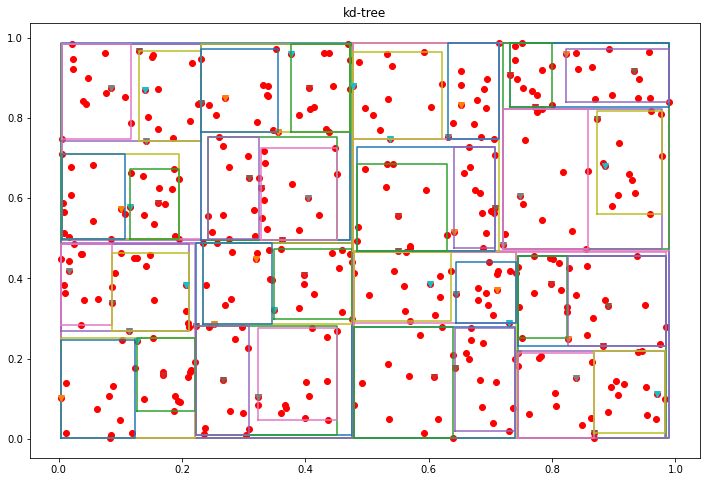

In [184]:
R1.imprime2()

In [186]:
centers=[[.75,.75]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
puntos_random = puntos_random+ [Point(arr) for arr in X]
R2=KDTree(10, puntos_random, nivel_max=4)

Numero de nodos:  1


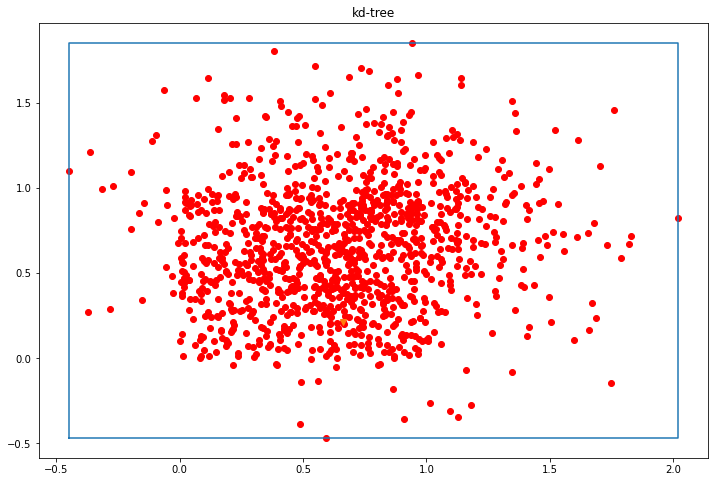

In [187]:
R2.imprime2()

In [188]:
R2.suvdivide()

Numero de nodos:  63


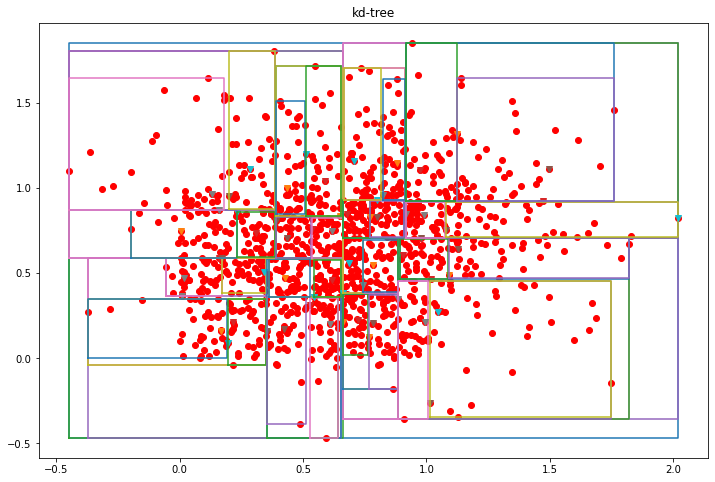

In [189]:
R2.imprime2()